In [2]:
import numpy as np
import tensorflow as tf
import os, shutil, pathlib
from tensorflow import keras
from keras import layers, activations, utils, optimizers, losses, metrics, callbacks
from keras import applications


In [3]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation=activations.softmax)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2023-09-08 13:36:48.687241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 13:36:48.687552: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


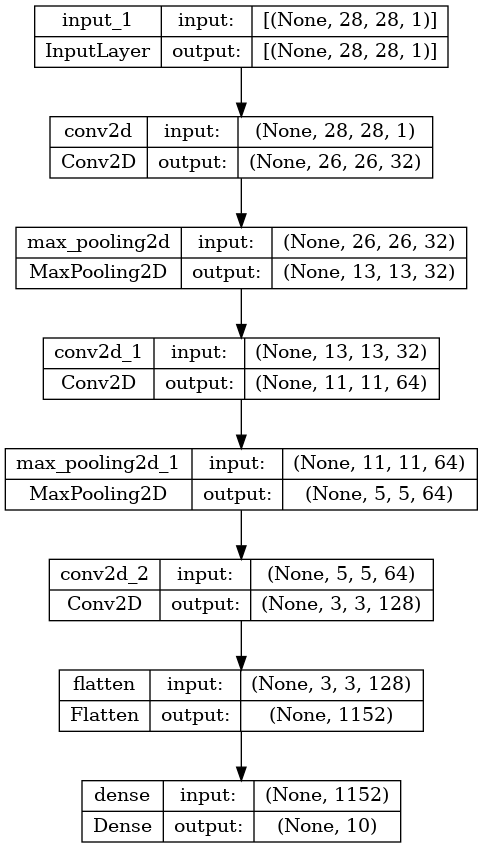

In [4]:
utils.plot_model(model, show_shapes=True)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype(np.float32) / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype(np.float32) / 255

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1542 - sparse_categorical_accuracy: 0.9523
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0313 - sparse_categorical_accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0234 - sparse_categorical_accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - sparse_categorical_accuracy: 0.9945


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 961us/step - loss: 0.0276 - sparse_categorical_accuracy: 0.9911
Test accuracy: 0.991100013256073


In [8]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        filenames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for filename in filenames:
            shutil.copyfile(src=original_dir / filename, dst=dir / filename)\

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

FileExistsError: [Errno 17] File exists: 'cats_vs_dogs_small/train/cat'

In [9]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1/255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

Found 2000 files belonging to 2 classes.


Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
data batch shape (32, 180, 180, 3)
labels batch shape (32,)
0


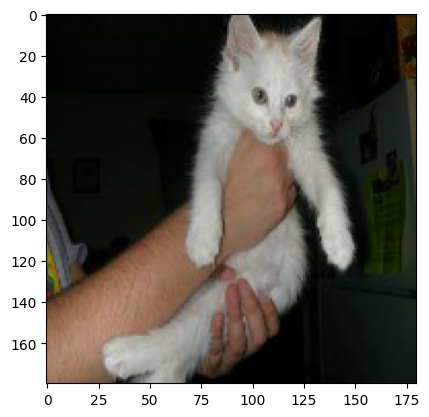

In [10]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

import matplotlib.pyplot as plt
for data_batch, labels_batch in train_dataset:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    print(labels_batch[0].numpy())
    plt.imshow(data_batch[0].numpy().astype(np.uint8))
    break



In [ ]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break



(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


In [ ]:
callback_list = [
    callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callback_list)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.6976 - binary_accuracy: 0.5255INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 19s 297ms/step - loss: 0.6976 - binary_accuracy: 0.5255 - val_loss: 0.6922 - val_binary_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6903 - binary_accuracy: 0.5425INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 18s 291ms/step - loss: 0.6903 - binary_accuracy: 0.5425 - val_loss: 0.6787 - val_binary_accuracy: 0.5370
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6761 - binary_accuracy: 0.5790INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 18s 292ms/step - loss: 0.6761 - binary_accuracy: 0.5790 - val_loss: 0.6457 - val_binary_accuracy: 0.6420
Epoch 4/30
63/63 [==============================] - 18s 292ms/step - loss: 0.6478 - binary_accuracy: 0.6155 - val_loss: 0.6704 - val_binary_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 19s 294ms/step - loss: 0.6279 - binary_accuracy: 0.6575 - val_loss: 0.6583 - val_binary_accuracy: 0.5730
Epoch 6/30
63/63 [==============================] - 18s 290ms/step - loss: 0.5780 - binary_accuracy: 0.6975 - val_loss: 0.7263 - val_binary_accuracy: 0.5600
Epoch 7/30
63/63 [==============================] - 18s 291ms/step - loss: 0.5525 - binary_accuracy: 0.7255 - val_loss: 0.6480 - val_binary_accuracy: 0.6680
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.5409 - binary_accuracy: 0.7430INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 19s 295ms/step - loss: 0.5409 - binary_accuracy: 0.7430 - val_loss: 0.5609 - val_binary_accuracy: 0.7040
Epoch 9/30
63/63 [==============================] - 18s 288ms/step - loss: 0.4806 - binary_accuracy: 0.7780 - val_loss: 0.5803 - val_binary_accuracy: 0.7030
Epoch 10/30
63/63 [==============================] - 18s 291ms/step - loss: 0.4411 - binary_accuracy: 0.7980 - val_loss: 0.5764 - val_binary_accuracy: 0.7230
Epoch 11/30
63/63 [==============================] - 18s 291ms/step - loss: 0.3917 - binary_accuracy: 0.8290 - val_loss: 0.6325 - val_binary_accuracy: 0.7050
Epoch 12/30
63/63 [==============================] - 18s 288ms/step - loss: 0.3641 - binary_accuracy: 0.8415 - val_loss: 0.6921 - val_binary_accuracy: 0.6780
Epoch 13/30
63/63 [==============================] - 18s 286ms/step - loss: 0.3021 - binary_accuracy: 0.8580 - val_loss: 0.6466 - val_binary_accuracy: 0.7190
Epoch 14/30
63/63 [==============================] - 18s 284ms/st

<Figure size 640x480 with 0 Axes>

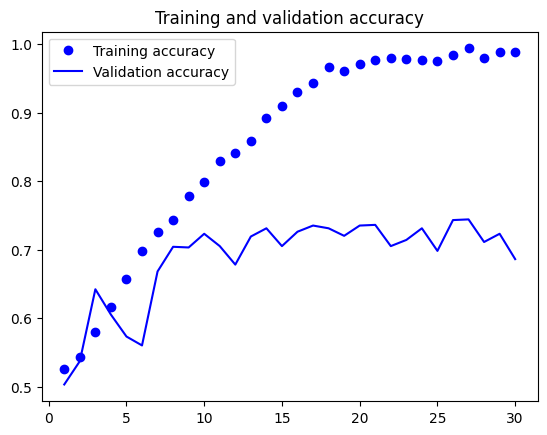

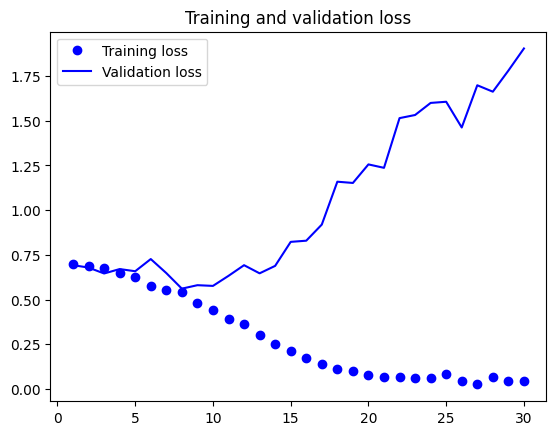

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [ ]:
test_model = keras.models.load_model('convnet_from_scratch')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 4s 69ms/step - loss: 0.5787 - binary_accuracy: 0.7085
Test accuracy: 0.709


(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)


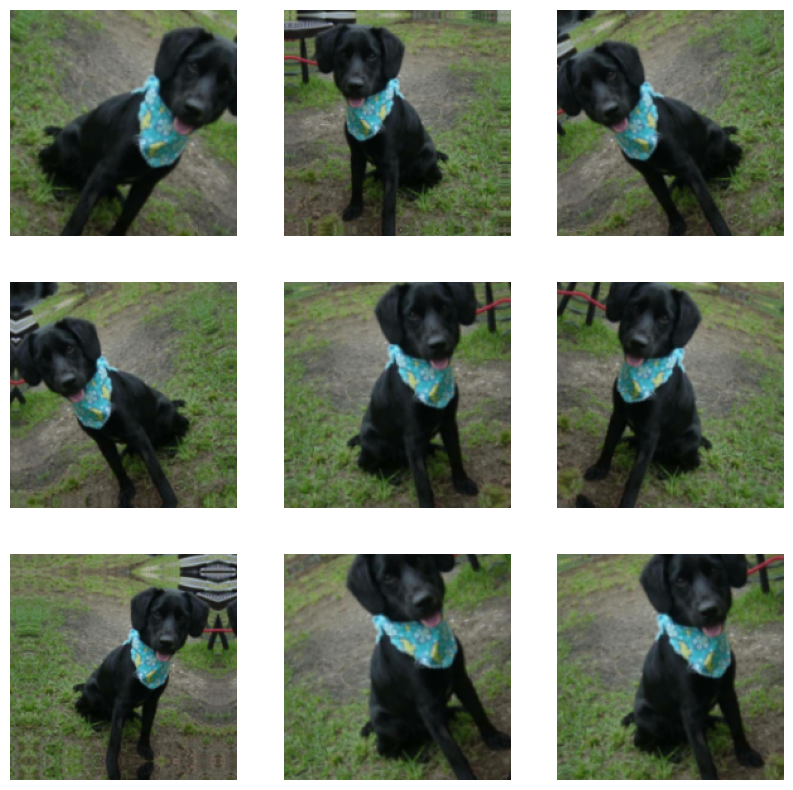

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    print(images.shape)
    for i in range(9):
        augmented_images = data_augmentation(images)
        print(augmented_images.shape)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype(np.uint8))
        plt.axis('off')

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1/255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [ ]:
callback_list = [
    callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callback_list)

Epoch 1/100


 3/63 [>.............................] - ETA: 1:13 - loss: 161.1173 - binary_accuracy: 0.5104

KeyboardInterrupt: 

In [ ]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

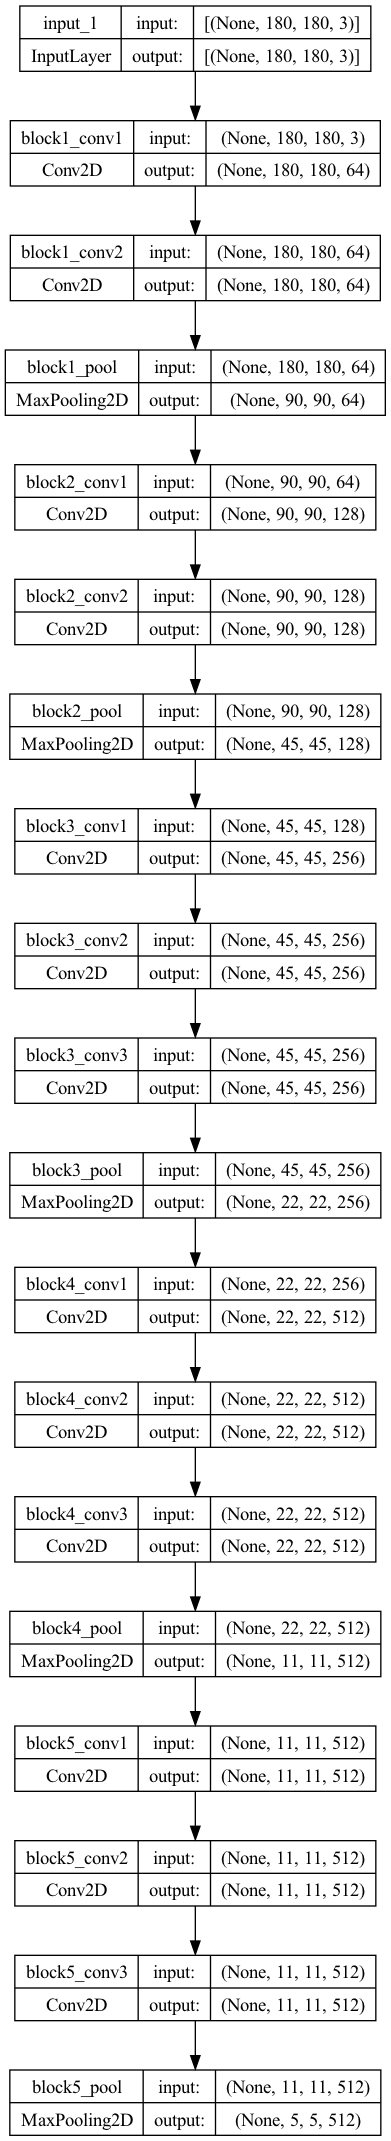

In [ ]:
utils.plot_model(conv_base, show_shapes=True)

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

for x in train_dataset:
    print(x)
    y, z = x
    print(y.shape)
    print(z.shape)
    break

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[189.      , 178.      , 156.      ],
         [189.      , 178.      , 156.      ],
         [189.      , 178.      , 156.      ],
         ...,
         [206.      , 196.      , 171.      ],
         [206.66663 , 196.66663 , 171.66663 ],
         [208.      , 198.      , 173.      ]],

        [[189.      , 178.      , 156.      ],
         [189.      , 178.      , 156.      ],
         [189.      , 178.      , 156.      ],
         ...,
         [206.      , 196.      , 171.      ],
         [206.66663 , 196.66663 , 171.66663 ],
         [208.      , 198.      , 173.      ]],

        [[189.      , 178.      , 156.      ],
         [189.      , 178.      , 156.      ],
         [189.      , 178.      , 156.      ],
         ...,
         [206.      , 196.      , 171.      ],
         [206.66663 , 196.66663 , 171.66663 ],
         [208.      , 198.      , 173.      ]],

        ...,

        [[210.5972  , 195.5972  

In [ ]:
inputs = layers.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback_list
)

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 15.3341 - binary_accuracy: 0.9275INFO:tensorflow:Assets written to: feature_extraction/assets


INFO:tensorflow:Assets written to: feature_extraction/assets


63/63 [==============================] - 1s 11ms/step - loss: 15.3341 - binary_accuracy: 0.9275 - val_loss: 3.2466 - val_binary_accuracy: 0.9720
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.5297 - binary_accuracy: 0.9820 - val_loss: 4.1319 - val_binary_accuracy: 0.9720
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.4845 - binary_accuracy: 0.9815 - val_loss: 8.2048 - val_binary_accuracy: 0.9640
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6202 - binary_accuracy: 0.9895 - val_loss: 8.1947 - val_binary_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3151 - binary_accuracy: 0.9910 - val_loss: 7.1787 - val_binary_accuracy: 0.9660
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0543 - binary_accuracy: 0.9930 - val_loss: 6.9836 - val_binary_accuracy: 0.9660
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7165 - bina

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


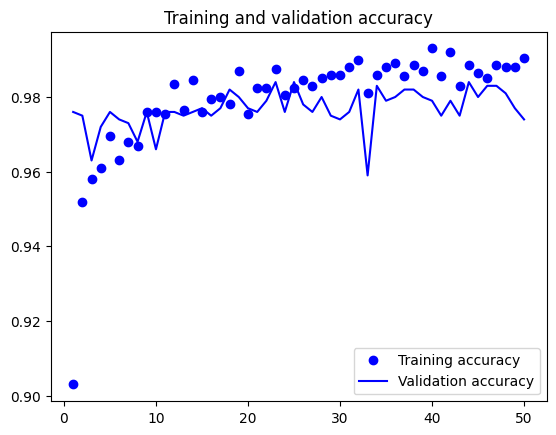

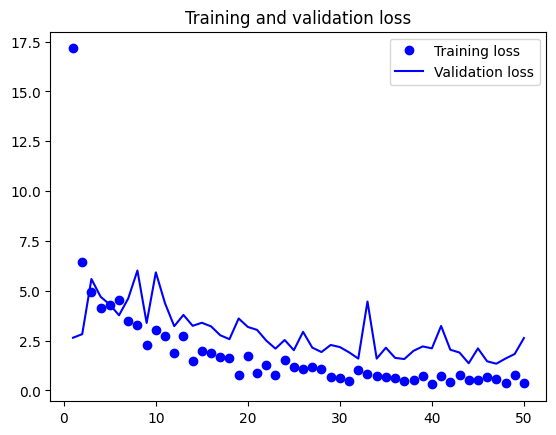

In [28]:
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
conv_base = applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False
)
print(f'Number of trainable weights {len(conv_base.trainable_weights)}')

conv_base.trainable = False
print(f'Number of trainable weights {len(conv_base.trainable_weights)}')

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

conv_base.summary(show_trainable=True)
model.summary(show_trainable=True)

Number of trainable weights 26
Number of trainable weights 0
Model: "vgg16"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_12 (InputLayer)       [(None, None, None, 3)]   0         N          
                                                                            
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     N          
                                                                            


In [52]:
callback_list = [
    callbacks.ModelCheckpoint(
        filepath='feature_extraction_with_augmentation',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callback_list
)

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 18.7206 - binary_accuracy: 0.8975INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 73s 1s/step - loss: 18.7206 - binary_accuracy: 0.8975 - val_loss: 8.3605 - val_binary_accuracy: 0.9450
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 7.8870 - binary_accuracy: 0.9390INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 72s 1s/step - loss: 7.8870 - binary_accuracy: 0.9390 - val_loss: 3.4105 - val_binary_accuracy: 0.9690
Epoch 3/50
63/63 [==============================] - 72s 1s/step - loss: 5.6850 - binary_accuracy: 0.9505 - val_loss: 4.2469 - val_binary_accuracy: 0.9700
Epoch 4/50
63/63 [==============================] - 73s 1s/step - loss: 5.5721 - binary_accuracy: 0.9540 - val_loss: 5.1001 - val_binary_accuracy: 0.9600
Epoch 5/50
63/63 [==============================] - ETA: 0s - loss: 3.6343 - binary_accuracy: 0.9600INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 3.6343 - binary_accuracy: 0.9600 - val_loss: 2.5375 - val_binary_accuracy: 0.9810
Epoch 6/50
63/63 [==============================] - ETA: 0s - loss: 3.2011 - binary_accuracy: 0.9660INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 3.2011 - binary_accuracy: 0.9660 - val_loss: 2.2694 - val_binary_accuracy: 0.9830
Epoch 7/50
63/63 [==============================] - 73s 1s/step - loss: 3.3966 - binary_accuracy: 0.9665 - val_loss: 2.6633 - val_binary_accuracy: 0.9800
Epoch 8/50
63/63 [==============================] - ETA: 0s - loss: 2.0869 - binary_accuracy: 0.9755INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 2.0869 - binary_accuracy: 0.9755 - val_loss: 2.1935 - val_binary_accuracy: 0.9840
Epoch 9/50
63/63 [==============================] - 73s 1s/step - loss: 1.5713 - binary_accuracy: 0.9810 - val_loss: 8.2142 - val_binary_accuracy: 0.9550
Epoch 10/50
63/63 [==============================] - 73s 1s/step - loss: 2.3622 - binary_accuracy: 0.9755 - val_loss: 3.0494 - val_binary_accuracy: 0.9760
Epoch 11/50
63/63 [==============================] - 73s 1s/step - loss: 2.5151 - binary_accuracy: 0.9690 - val_loss: 2.5468 - val_binary_accuracy: 0.9810
Epoch 12/50
63/63 [==============================] - 72s 1s/step - loss: 1.7408 - binary_accuracy: 0.9795 - val_loss: 2.4836 - val_binary_accuracy: 0.9780
Epoch 13/50
63/63 [==============================] - ETA: 0s - loss: 1.6942 - binary_accuracy: 0.9755INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 1.6942 - binary_accuracy: 0.9755 - val_loss: 2.1808 - val_binary_accuracy: 0.9800
Epoch 14/50
63/63 [==============================] - ETA: 0s - loss: 1.2837 - binary_accuracy: 0.9805INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 1.2837 - binary_accuracy: 0.9805 - val_loss: 2.0787 - val_binary_accuracy: 0.9830
Epoch 15/50
63/63 [==============================] - 73s 1s/step - loss: 1.1447 - binary_accuracy: 0.9810 - val_loss: 2.4733 - val_binary_accuracy: 0.9790
Epoch 16/50
63/63 [==============================] - ETA: 0s - loss: 2.1094 - binary_accuracy: 0.9735INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 2.1094 - binary_accuracy: 0.9735 - val_loss: 2.0614 - val_binary_accuracy: 0.9800
Epoch 17/50
63/63 [==============================] - 73s 1s/step - loss: 1.0109 - binary_accuracy: 0.9820 - val_loss: 2.3063 - val_binary_accuracy: 0.9800
Epoch 18/50
63/63 [==============================] - 73s 1s/step - loss: 1.2892 - binary_accuracy: 0.9795 - val_loss: 2.5840 - val_binary_accuracy: 0.9760
Epoch 19/50
63/63 [==============================] - 73s 1s/step - loss: 1.2454 - binary_accuracy: 0.9800 - val_loss: 2.3190 - val_binary_accuracy: 0.9750
Epoch 20/50
63/63 [==============================] - 73s 1s/step - loss: 0.7736 - binary_accuracy: 0.9870 - val_loss: 2.1145 - val_binary_accuracy: 0.9770
Epoch 21/50
63/63 [==============================] - 73s 1s/step - loss: 0.6915 - binary_accuracy: 0.9855 - val_loss: 2.4764 - val_binary_accuracy: 0.9790
Epoch 22/50
63/63 [==============================] - 73s 1s/step - loss: 1.2444 - 

INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 73s 1s/step - loss: 0.7133 - binary_accuracy: 0.9855 - val_loss: 1.6903 - val_binary_accuracy: 0.9830
Epoch 28/50
63/63 [==============================] - 72s 1s/step - loss: 0.4610 - binary_accuracy: 0.9855 - val_loss: 1.8979 - val_binary_accuracy: 0.9850
Epoch 29/50
63/63 [==============================] - 72s 1s/step - loss: 1.0294 - binary_accuracy: 0.9820 - val_loss: 2.7467 - val_binary_accuracy: 0.9740
Epoch 30/50
63/63 [==============================] - 72s 1s/step - loss: 0.8180 - binary_accuracy: 0.9835 - val_loss: 2.4737 - val_binary_accuracy: 0.9790
Epoch 31/50
63/63 [==============================] - 72s 1s/step - loss: 0.4112 - binary_accuracy: 0.9895 - val_loss: 2.1104 - val_binary_accuracy: 0.9820
Epoch 32/50
63/63 [==============================] - ETA: 0s - loss: 0.5874 - binary_accuracy: 0.9840INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 73s 1s/step - loss: 0.5874 - binary_accuracy: 0.9840 - val_loss: 1.6875 - val_binary_accuracy: 0.9820
Epoch 33/50
63/63 [==============================] - ETA: 0s - loss: 0.7795 - binary_accuracy: 0.9875INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 73s 1s/step - loss: 0.7795 - binary_accuracy: 0.9875 - val_loss: 1.6612 - val_binary_accuracy: 0.9800
Epoch 34/50
63/63 [==============================] - 72s 1s/step - loss: 0.7235 - binary_accuracy: 0.9865 - val_loss: 1.7177 - val_binary_accuracy: 0.9820
Epoch 35/50
63/63 [==============================] - 72s 1s/step - loss: 0.5989 - binary_accuracy: 0.9845 - val_loss: 2.1666 - val_binary_accuracy: 0.9770
Epoch 36/50
63/63 [==============================] - 72s 1s/step - loss: 0.5131 - binary_accuracy: 0.9875 - val_loss: 1.9869 - val_binary_accuracy: 0.9800
Epoch 37/50
63/63 [==============================] - 72s 1s/step - loss: 0.5458 - binary_accuracy: 0.9885 - val_loss: 2.2152 - val_binary_accuracy: 0.9760
Epoch 38/50
63/63 [==============================] - 72s 1s/step - loss: 0.3548 - binary_accuracy: 0.9885 - val_loss: 2.8722 - val_binary_accuracy: 0.9740
Epoch 39/50
63/63 [==============================] - 73s 1s/step - loss: 0.6057 - 

INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 0.6873 - binary_accuracy: 0.9850 - val_loss: 1.4779 - val_binary_accuracy: 0.9820
Epoch 41/50
63/63 [==============================] - 73s 1s/step - loss: 0.6417 - binary_accuracy: 0.9865 - val_loss: 1.5702 - val_binary_accuracy: 0.9810
Epoch 42/50
63/63 [==============================] - 72s 1s/step - loss: 0.4306 - binary_accuracy: 0.9880 - val_loss: 1.9783 - val_binary_accuracy: 0.9780
Epoch 43/50
63/63 [==============================] - 72s 1s/step - loss: 0.5637 - binary_accuracy: 0.9885 - val_loss: 1.4979 - val_binary_accuracy: 0.9830
Epoch 44/50
63/63 [==============================] - ETA: 0s - loss: 0.2902 - binary_accuracy: 0.9910INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 0.2902 - binary_accuracy: 0.9910 - val_loss: 1.2587 - val_binary_accuracy: 0.9850
Epoch 45/50
63/63 [==============================] - ETA: 0s - loss: 0.6145 - binary_accuracy: 0.9850INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 73s 1s/step - loss: 0.6145 - binary_accuracy: 0.9850 - val_loss: 1.1865 - val_binary_accuracy: 0.9840
Epoch 46/50
63/63 [==============================] - 72s 1s/step - loss: 0.2642 - binary_accuracy: 0.9915 - val_loss: 1.8303 - val_binary_accuracy: 0.9790
Epoch 47/50
63/63 [==============================] - 72s 1s/step - loss: 0.7280 - binary_accuracy: 0.9840 - val_loss: 1.2840 - val_binary_accuracy: 0.9810
Epoch 48/50
63/63 [==============================] - 72s 1s/step - loss: 0.5304 - binary_accuracy: 0.9875 - val_loss: 1.5786 - val_binary_accuracy: 0.9800
Epoch 49/50
63/63 [==============================] - ETA: 0s - loss: 0.5257 - binary_accuracy: 0.9875INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


INFO:tensorflow:Assets written to: feature_extraction_with_augmentation/assets


63/63 [==============================] - 74s 1s/step - loss: 0.5257 - binary_accuracy: 0.9875 - val_loss: 1.0133 - val_binary_accuracy: 0.9840
Epoch 50/50
63/63 [==============================] - 72s 1s/step - loss: 0.3671 - binary_accuracy: 0.9890 - val_loss: 1.0958 - val_binary_accuracy: 0.9860


In [53]:
test_model = keras.models.load_model('feature_extraction_with_augmentation')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 48s 754ms/step - loss: 1.9857 - binary_accuracy: 0.9760
Test accuracy: 0.976


In [55]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

conv_base.summary(show_trainable=True)

Model: "vgg16"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_12 (InputLayer)       [(None, None, None, 3)]   0         N          
                                                                            
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     N          
                                                                            
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584

In [56]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

callback_list = [
    callbacks.ModelCheckpoint(
        filepath='fine_tuning',
        save_best_only=True,
        monitor='val_loss'
    )
]

model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=callback_list)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.3162 - binary_accuracy: 0.9885INFO:tensorflow:Assets written to: fine_tuning/assets


INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.3162 - binary_accuracy: 0.9885 - val_loss: 1.2175 - val_binary_accuracy: 0.9840
Epoch 2/30
63/63 [==============================] - 81s 1s/step - loss: 0.3219 - binary_accuracy: 0.9910 - val_loss: 1.2312 - val_binary_accuracy: 0.9860
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.2316 - binary_accuracy: 0.9925INFO:tensorflow:Assets written to: fine_tuning/assets


INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.2316 - binary_accuracy: 0.9925 - val_loss: 1.1386 - val_binary_accuracy: 0.9860
Epoch 4/30
63/63 [==============================] - 82s 1s/step - loss: 0.2502 - binary_accuracy: 0.9930 - val_loss: 1.1701 - val_binary_accuracy: 0.9850
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.3495 - binary_accuracy: 0.9885INFO:tensorflow:Assets written to: fine_tuning/assets


INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.3495 - binary_accuracy: 0.9885 - val_loss: 1.0560 - val_binary_accuracy: 0.9850
Epoch 6/30
63/63 [==============================] - 82s 1s/step - loss: 0.1104 - binary_accuracy: 0.9955 - val_loss: 1.1662 - val_binary_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 82s 1s/step - loss: 0.2855 - binary_accuracy: 0.9900 - val_loss: 1.1448 - val_binary_accuracy: 0.9810
Epoch 8/30
63/63 [==============================] - 82s 1s/step - loss: 0.2039 - binary_accuracy: 0.9915 - val_loss: 1.3375 - val_binary_accuracy: 0.9790
Epoch 9/30
63/63 [==============================] - 82s 1s/step - loss: 0.2232 - binary_accuracy: 0.9920 - val_loss: 1.9236 - val_binary_accuracy: 0.9750
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.1428 - binary_accuracy: 0.9930INFO:tensorflow:Assets written to: fine_tuning/assets


INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.1428 - binary_accuracy: 0.9930 - val_loss: 1.0336 - val_binary_accuracy: 0.9830
Epoch 11/30
63/63 [==============================] - 82s 1s/step - loss: 0.1947 - binary_accuracy: 0.9925 - val_loss: 1.3088 - val_binary_accuracy: 0.9800
Epoch 12/30
63/63 [==============================] - ETA: 0s - loss: 0.2332 - binary_accuracy: 0.9930INFO:tensorflow:Assets written to: fine_tuning/assets


INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.2332 - binary_accuracy: 0.9930 - val_loss: 0.9446 - val_binary_accuracy: 0.9850
Epoch 13/30
63/63 [==============================] - 82s 1s/step - loss: 0.1002 - binary_accuracy: 0.9945 - val_loss: 0.9732 - val_binary_accuracy: 0.9830
Epoch 14/30
63/63 [==============================] - ETA: 0s - loss: 0.1507 - binary_accuracy: 0.9930INFO:tensorflow:Assets written to: fine_tuning/assets


INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.1507 - binary_accuracy: 0.9930 - val_loss: 0.8712 - val_binary_accuracy: 0.9840
Epoch 15/30
63/63 [==============================] - 82s 1s/step - loss: 0.1649 - binary_accuracy: 0.9950 - val_loss: 1.0222 - val_binary_accuracy: 0.9800
Epoch 16/30
63/63 [==============================] - 82s 1s/step - loss: 0.0905 - binary_accuracy: 0.9955 - val_loss: 1.1497 - val_binary_accuracy: 0.9800
Epoch 17/30
63/63 [==============================] - 82s 1s/step - loss: 0.0542 - binary_accuracy: 0.9970 - val_loss: 1.0864 - val_binary_accuracy: 0.9800
Epoch 18/30
63/63 [==============================] - 82s 1s/step - loss: 0.1938 - binary_accuracy: 0.9930 - val_loss: 1.2620 - val_binary_accuracy: 0.9810
Epoch 19/30
63/63 [==============================] - 82s 1s/step - loss: 0.1167 - binary_accuracy: 0.9950 - val_loss: 1.0147 - val_binary_accuracy: 0.9810
Epoch 20/30
63/63 [==============================] - 81s 1s/step - loss: 0.0690 - 

INFO:tensorflow:Assets written to: fine_tuning/assets


63/63 [==============================] - 83s 1s/step - loss: 0.0151 - binary_accuracy: 0.9990 - val_loss: 0.8406 - val_binary_accuracy: 0.9850
Epoch 25/30
63/63 [==============================] - 82s 1s/step - loss: 0.1478 - binary_accuracy: 0.9940 - val_loss: 0.9581 - val_binary_accuracy: 0.9840
Epoch 26/30
63/63 [==============================] - 82s 1s/step - loss: 0.0751 - binary_accuracy: 0.9970 - val_loss: 1.1615 - val_binary_accuracy: 0.9840
Epoch 27/30
63/63 [==============================] - 82s 1s/step - loss: 0.0936 - binary_accuracy: 0.9965 - val_loss: 1.0772 - val_binary_accuracy: 0.9830
Epoch 28/30
63/63 [==============================] - 82s 1s/step - loss: 0.0799 - binary_accuracy: 0.9960 - val_loss: 1.2721 - val_binary_accuracy: 0.9830
Epoch 29/30
63/63 [==============================] - 82s 1s/step - loss: 0.0378 - binary_accuracy: 0.9965 - val_loss: 0.9978 - val_binary_accuracy: 0.9870
Epoch 30/30
63/63 [==============================] - 82s 1s/step - loss: 0.0997 - 

In [57]:
model = keras.models.load_model('fine_tuning')
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 47s 741ms/step - loss: 1.2967 - binary_accuracy: 0.9775
Test accuracy: 0.978
